In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
from sklearn import datasets, metrics, tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from math import sqrt
from matplotlib import pyplot as plt
import numpy as np

def write_answer(n, a):
    with open("a%i.txt" % n, "w") as fout:
        fout.write(str(a))

In [12]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [5]:
tree_classifier = tree.DecisionTreeClassifier()
scores = cross_val_score(tree_classifier, X, y, cv=10)
a1 = scores.mean()
print(a1)
write_answer(1, a1)

0.827515158322


In [6]:
bagging_classifier = BaggingClassifier(tree_classifier, n_estimators=100)
scores = cross_val_score(bagging_classifier, X, y, cv=10)
a2 = scores.mean()
print(a2)
write_answer(2, a2)

0.923244961635


In [7]:
d = X.shape[1]
print("d=%i" %d)
bagging_classifier = BaggingClassifier(tree_classifier, n_estimators=100, max_features="sqrt")
scores = cross_val_score(bagging_classifier, X, y, cv=10)
a3 = scores.mean()
print(a3)
write_answer(3, a3)

d=64
0.933301168723


In [8]:
tree_classifier = tree.DecisionTreeClassifier(max_features=mf)
bagging_classifier = BaggingClassifier(tree_classifier, n_estimators=100)
scores = cross_val_score(bagging_classifier, X, y, cv=10)
a4 = scores.mean()
print(a4)
write_answer(4, a4)

0.953323885839


n_estimators means calculation has started
n_estimators=2 calculating...
n_estimators=10 calculating...
n_estimators=50 calculating...
n_estimators=100 calculating...
n_estimators means calculation has finished
[ 0.74085567  0.92382837  0.94835906  0.95160457]


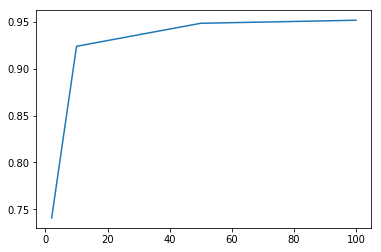

In [34]:
n_estimators_set = [2, 10, 50, 100]
means = np.array([])
print("n_estimators means calculation has started")
for n in n_estimators_set:
    print("n_estimators=%i calculating..." % n)
    means = np.append(means, cross_val_score(RandomForestClassifier(n_estimators=n), X, y, cv=10).mean())
print("n_estimators means calculation has finished")    
print(means)
plt.plot(n_estimators_set, means, label=n_estimators_set)

max_features_set means calculation has started
max_features=2 calculating...
max_features=10 calculating...
max_features=30 calculating...
max_features=64 calculating...
max_features_set means calculation has finished
[ 0.90055693  0.92157267  0.91099716  0.9043815 ]


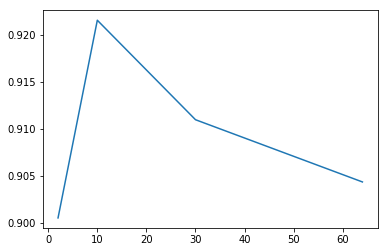

In [29]:
max_features_set = [2, 10, 30, 64]
means = np.array([])
print("max_features_set means calculation has started")
for n in max_features_set:
    print("max_features=%i calculating..." % n)
    means = np.append(means, cross_val_score(RandomForestClassifier(max_features=n), X, y, cv=10).mean())
print("max_features_set means calculation has finished")    
print(means)
plt.plot(max_features_set, means, label=n_estimators_set)

max_depth_set means calculation has started
max_depth=2 calculating...
max_depth=10 calculating...
max_depth=20 calculating...
max_depth=None calculating...
max_depth_set means calculation has finished
[ 0.68571919  0.91871738  0.91327329  0.92591386]


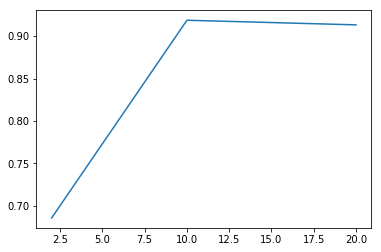

In [35]:
max_depth_set = [2, 10, 20, None]
means = np.array([])
print("max_depth_set means calculation has started")
for n in max_depth_set:
    print("max_depth=%s calculating..." % str(n))
    means = np.append(means, cross_val_score(RandomForestClassifier(max_depth=n), X, y, cv=10).mean())
print("max_depth_set means calculation has finished")    
print(means)
plt.plot(max_depth_set, means, label=n_estimators_set)

In [38]:
with open("a5.txt", "w") as fout:
    fout.write("2 3 4 7")